# Exploration of Sentiment Analysis on Movie Reviews

For this exploration, I have explored the effects of AAA on BBB of Movie Reviews. 

Initially I imported and printed the data on the screen. 

In [29]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# thinkstats tool
import thinkstats2
import thinkplot

# numpy, matplotlib, seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# get train & test csv files as a DataFrame
train = pd.read_csv("train.tsv", sep='\t')
test = pd.read_csv("test.tsv", sep='\t')

In [34]:
def createLowerWordList(line):
    wordList2 =[]
    wordList1 = line.split()
    for word in wordList1:
        cleanWord = ""
        for char in word:
            if char in '!,.?":;0123456789':
                char = ""
            cleanWord += char
        cleanWord = cleanWord.lower()
        if cleanWord != "":
            wordList2.append(cleanWord)
    return wordList2

def add_length(df):
    length = lambda x: len(createLowerWordList(x))
    df['Length'] = df['Phrase'].apply(length)

add_length(train)

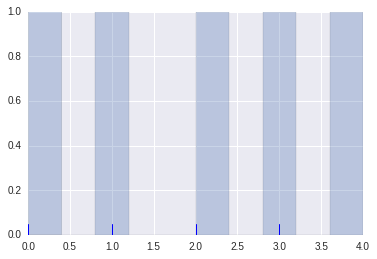

In [43]:
# sns.jointplot(x="Length", y="Sentiment", data=train[['Length', 'Sentiment']]);
def get_average_length_sentiment(df):
    dict = {}
    dict[0] = df[df['Sentiment'] == 0]['Length'].mean()
    dict[1] = df[df['Sentiment'] == 1]['Length'].mean()
    dict[2] = df[df['Sentiment'] == 2]['Length'].mean()
    dict[3] = df[df['Sentiment'] == 3]['Length'].mean()
    dict[4] = df[df['Sentiment'] == 4]['Length'].mean()
    
    return pd.DataFrame(dict.items(), columns=['Sentiment', 'Length'])

length_df = get_average_length_sentiment(train)
plt.hist(length_df.Sentiment, alpha=.3)
sns.rugplot(length_df.Sentiment);

In [9]:
def word_df(df):
    word_dict = {}
    for index, row in df.iterrows():
        list = createLowerWordList(row["Phrase"])
        sentiment = row["Sentiment"]
        for word in list:
            if word in word_dict:
                word_dict[word][0] += 1
                word_dict[word][1] = (word_dict[word][1]*(word_dict[word][0]-1) + sentiment) / float(word_dict[word][0])
            else:
                word_dict[word] = [1, sentiment]
    return pd.DataFrame(word_dict.items(), columns=["Word", "Frequency-Sentiment"])

word_df = word_df(train)

In [10]:
first = lambda x: x[0]
second = lambda x: x[1]
word_df['Frequency'] = word_df['Frequency-Sentiment'].apply(first)
word_df['Sentiment'] = word_df['Frequency-Sentiment'].apply(second)
word_df.sort_values('Frequency', ascending=False)

,Word,Frequency-Sentiment,Frequency,Sentiment
4916,the,"[51220, 2.06231940648]",51220,2.062319
6401,a,"[36130, 2.11527816219]",36130,2.115278
14139,of,"[32308, 2.10279187817]",32308,2.102792
13698,and,"[31763, 2.18619148065]",31763,2.186191
2097,to,"[22448, 1.96387205987]",22448,1.963872
986,'s,"[17181, 2.04988068215]",17181,2.049881
8865,in,"[13745, 2.03339396144]",13745,2.033394
8856,is,"[13447, 2.03688555068]",13447,2.036886
5606,that,"[12327, 2.04445526081]",12327,2.044455
8858,it,"[11677, 1.95221375353]",11677,1.952214


64.89057135850908

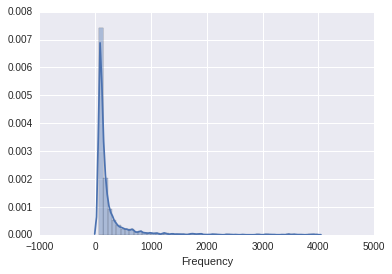

In [28]:
sns.distplot(word_df[(word_df['Frequency'] > 64) & (word_df['Frequency'] < 4700)].Frequency);
word_df['Frequency'].mean()

/home/yuzhong/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


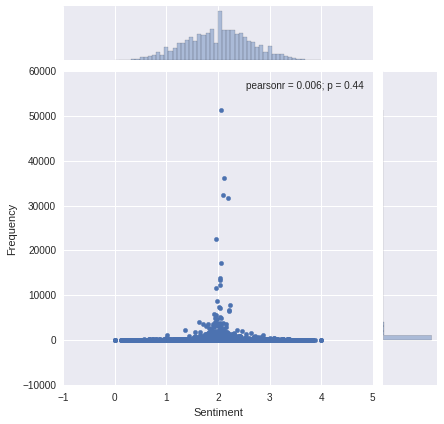

In [4]:
sns.jointplot(x="Sentiment", y="Frequency", data=word_df[['Frequency', 'Sentiment']]);